In [12]:
from itertools import chain
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings

warnings.filterwarnings('ignore')

In [13]:
df = pd.read_csv('VLagun_Total_Years_depth.csv')
df = df.iloc[:, 0:57]
test_size = 0.3
dftrain, dftest = train_test_split(df, test_size=test_size, random_state=0)

dftrain.head()

,PSU,O2,temp.,SS,SRP,DOP,PP,NH4N,NO3N,DON,...,Keratella cochlearis cochlearis,Keratella cochlearis f.tecta,Keratella quadrata,Polyarthra vulgaris,Polyarthra platyptera,Pompholyx sp.,Synchaeta sp.,Trichocerca pusilla,Trichocerca similis,Depth
2,3.721,9.63,17.5,62.00,11.7,13.0,117.6,0.036,0.021,0.727,...,0.012,0.004,0.000,0.000,0.000,0.0,0.0,0.000,0.0,3.0
124,2.600,12.28,11.3,40.00,5.7,8.1,75.6,0.020,0.023,0.483,...,0.000,0.006,0.011,0.000,0.000,0.0,0.0,0.000,0.0,3.0
43,2.400,12.11,10.9,29.00,4.5,9.3,77.8,0.028,0.027,0.575,...,0.000,0.010,0.015,0.000,0.000,0.0,0.0,0.000,0.0,3.5
100,3.342,11.15,20.0,68.75,10.9,51.0,107.9,0.012,0.029,0.543,...,0.040,0.004,0.000,0.000,0.000,0.0,0.0,0.000,0.0,2.0
10,4.083,10.46,20.5,53.75,11.7,16.6,161.3,0.002,0.043,0.536,...,1.923,0.036,0.018,0.149,0.437,0.0,0.0,0.002,0.0,3.5


In [14]:
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
Index: 108 entries, 2 to 47
Data columns (total 57 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   PSU                                     108 non-null    float64
 1   O2                                      108 non-null    float64
 2   temp.                                   108 non-null    float64
 3   SS                                      108 non-null    float64
 4   SRP                                     108 non-null    float64
 5   DOP                                     108 non-null    float64
 6   PP                                      108 non-null    float64
 7   NH4N                                    108 non-null    float64
 8   NO3N                                    108 non-null    float64
 9   DON                                     108 non-null    float64
 10  PN                                      108 non-null    float64
 11 

<Axes: >

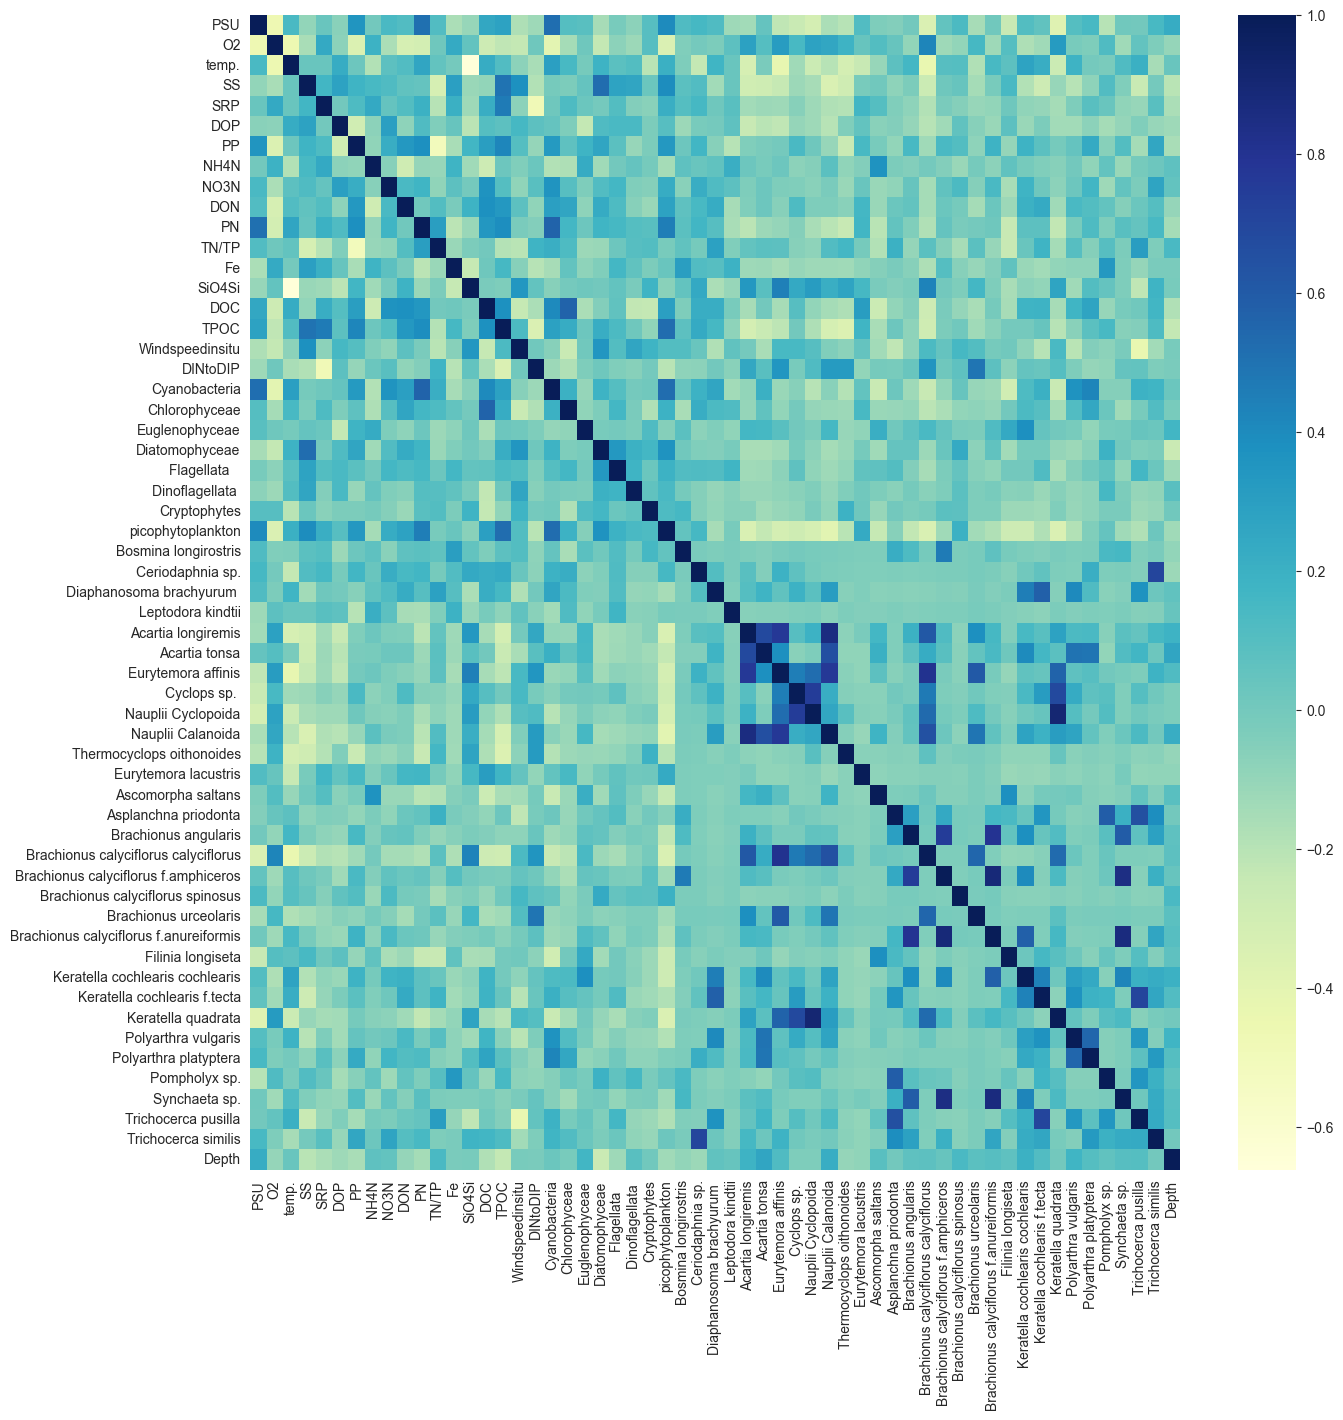

In [15]:
plt.figure(figsize=(15, 15))
sns.heatmap(dftrain.corr(), fmt='.2f', cmap='YlGnBu')

In [16]:
dftrain.describe()

,PSU,O2,temp.,SS,SRP,DOP,PP,NH4N,NO3N,DON,...,Keratella cochlearis cochlearis,Keratella cochlearis f.tecta,Keratella quadrata,Polyarthra vulgaris,Polyarthra platyptera,Pompholyx sp.,Synchaeta sp.,Trichocerca pusilla,Trichocerca similis,Depth
count,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,...,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000
mean,3.307046,10.158056,17.350926,88.412778,14.171296,22.078704,135.981481,0.029963,0.037315,0.560352,...,0.299259,0.021657,0.021241,0.007407,0.011296,0.000741,0.002333,0.000546,0.000639,3.050926
std,0.764205,1.065294,3.220451,37.109523,12.065453,18.740371,50.191709,0.018803,0.021279,0.172777,...,0.825955,0.050094,0.084691,0.026193,0.052932,0.002930,0.013138,0.001748,0.002189,0.546612
min,1.500000,8.420000,10.600000,29.000000,1.100000,0.800000,20.900000,0.002000,0.007000,0.022000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.500000
25%,2.700000,9.340000,16.200000,61.187500,7.375000,8.900000,99.950000,0.019000,0.024000,0.487750,...,0.002000,0.001000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
50%,3.342000,9.940000,18.000000,80.000000,11.700000,15.850000,134.650000,0.026500,0.032000,0.563000,...,0.016000,0.003500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
75%,3.870000,10.900000,20.100000,112.500000,15.975000,30.300000,171.100000,0.036000,0.045500,0.680500,...,0.044250,0.009000,0.003500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.500000
max,4.500000,12.850000,20.700000,217.500000,88.200000,83.600000,285.100000,0.106000,0.142000,0.975000,...,5.311000,0.271000,0.804000,0.167000,0.437000,0.017000,0.118000,0.011000,0.013000,4.000000


In [17]:
dftrain.columns

Index(['PSU', 'O2', 'temp.', 'SS', 'SRP', 'DOP', 'PP', 'NH4N', 'NO3N', 'DON',
       'PN', 'TN/TP', 'Fe', 'SiO4Si', 'DOC', 'TPOC', 'Windspeedinsitu',
       'DINtoDIP', 'Cyanobacteria', 'Chlorophyceae', 'Euglenophyceae',
       'Diatomophyceae', 'Flagellata   ', 'Dinoflagellata ', 'Cryptophytes',
       'picophytoplankton', 'Bosmina longirostris', 'Ceriodaphnia sp.',
       'Diaphanosoma brachyurum ', 'Leptodora kindtii', 'Acartia longiremis',
       'Acartia tonsa', 'Eurytemora affinis', 'Cyclops sp. ',
       'Nauplii Cyclopoida', 'Nauplii Calanoida', 'Thermocyclops oithonoides',
       'Eurytemora lacustris', 'Ascomorpha saltans', 'Asplanchna priodonta',
       'Brachionus angularis', 'Brachionus calyciflorus calyciflorus',
       'Brachionus calyciflorus f.amphiceros',
       'Brachionus calyciflorus spinosus', 'Brachionus urceolaris',
       'Brachionus calyciflorus f.anureiformis', 'Filinia longiseta',
       'Keratella cochlearis cochlearis', 'Keratella cochlearis f.tecta',
    

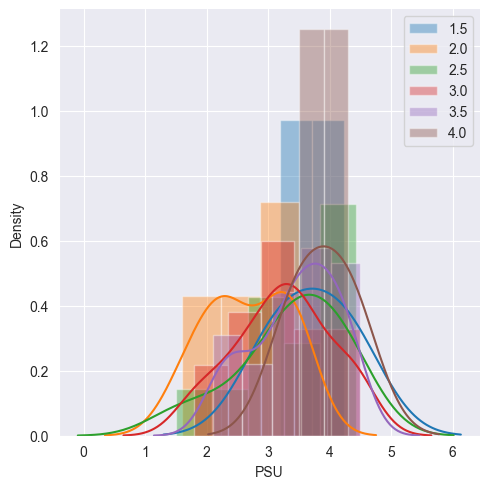

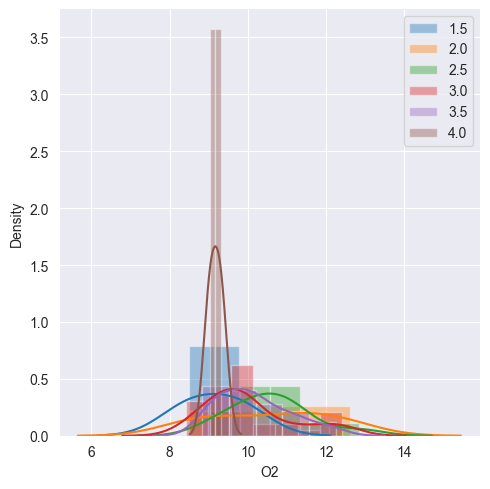

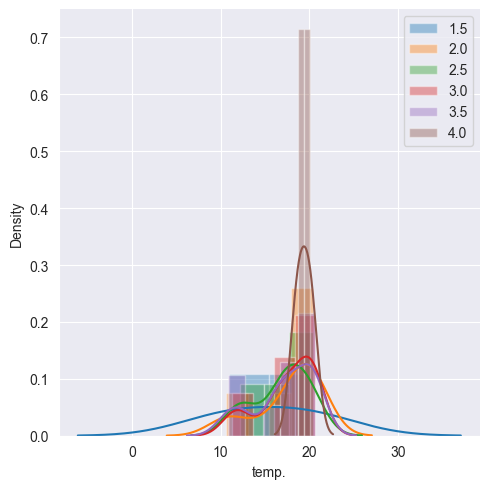

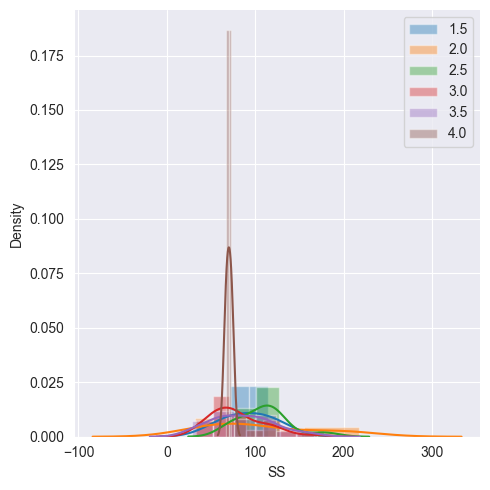

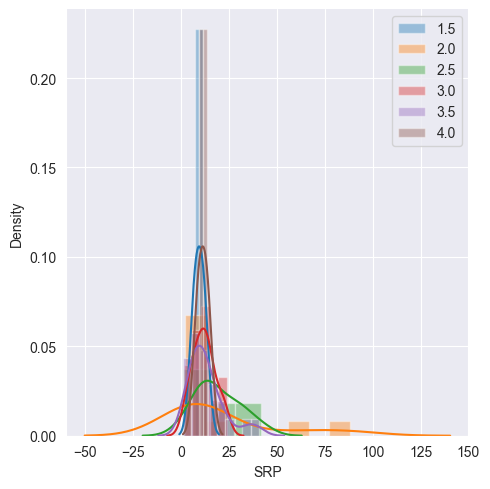

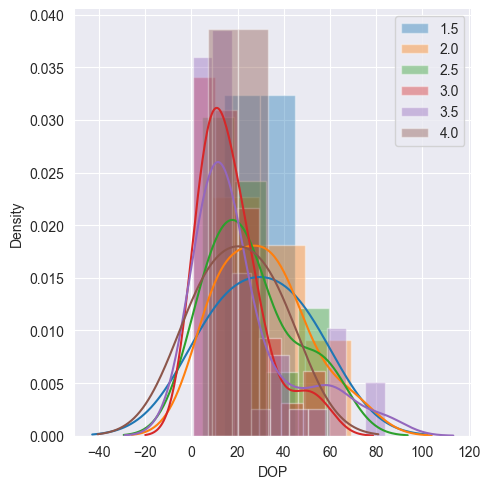

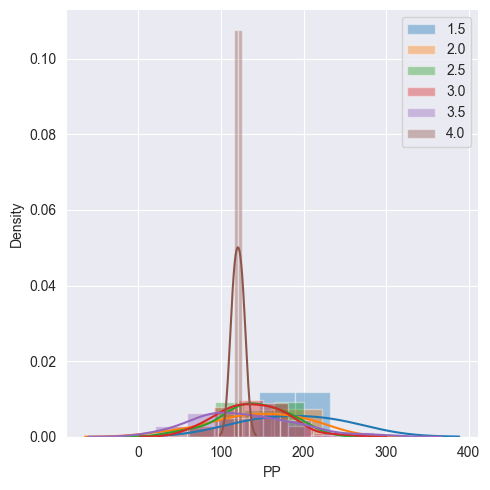

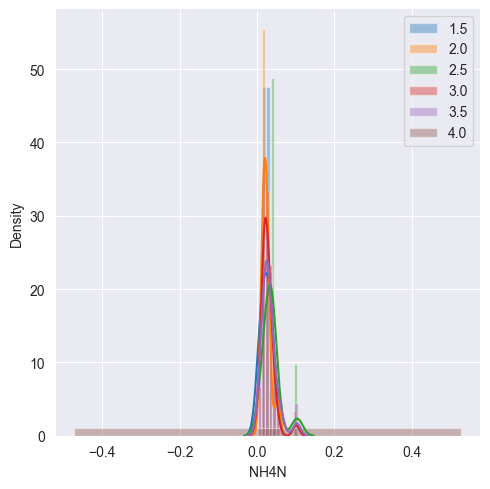

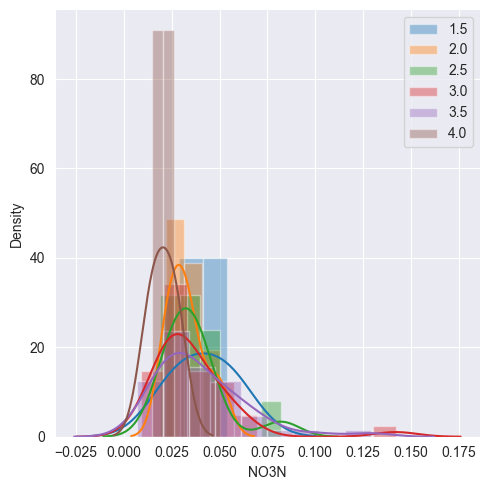

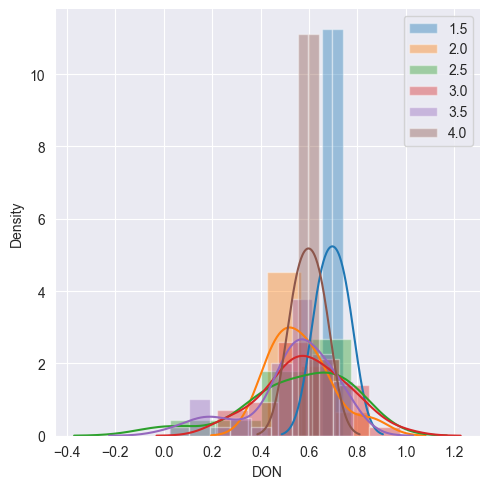

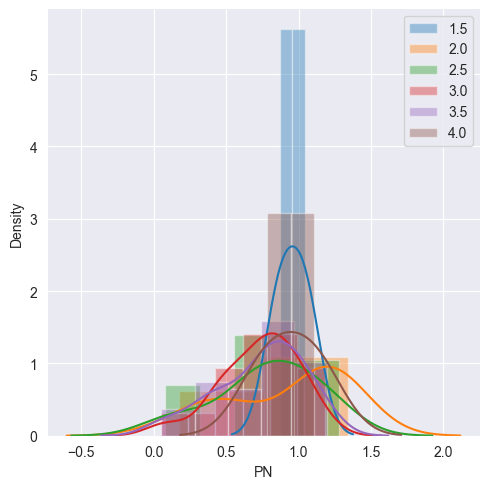

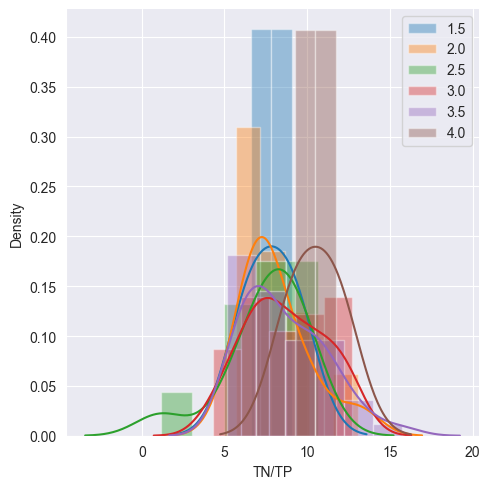

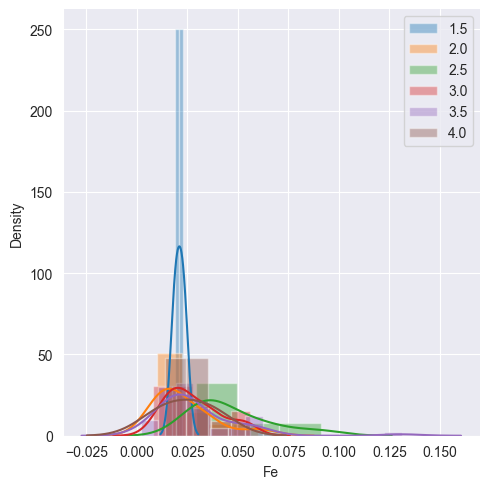

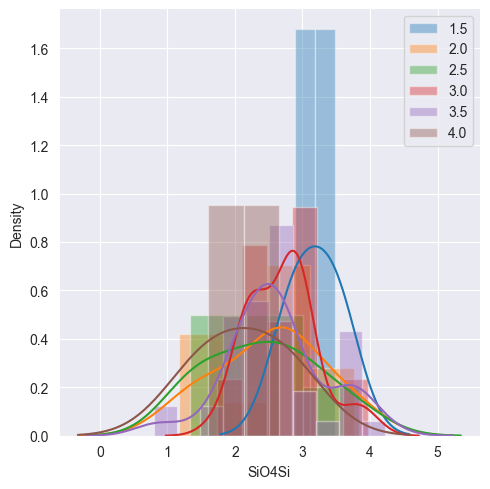

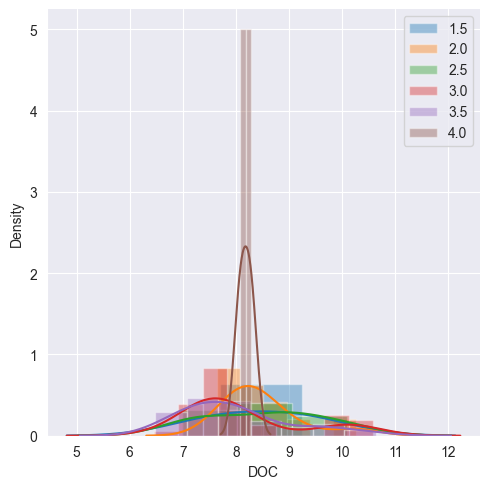

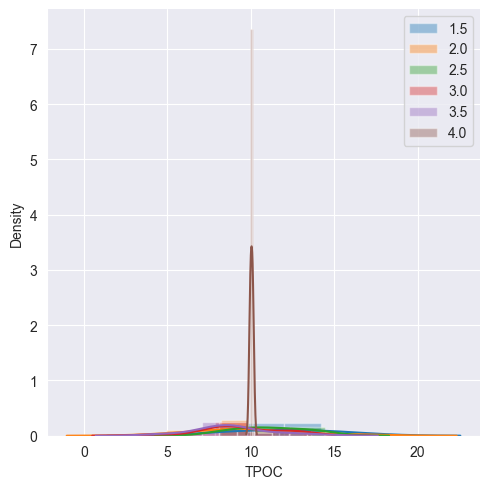

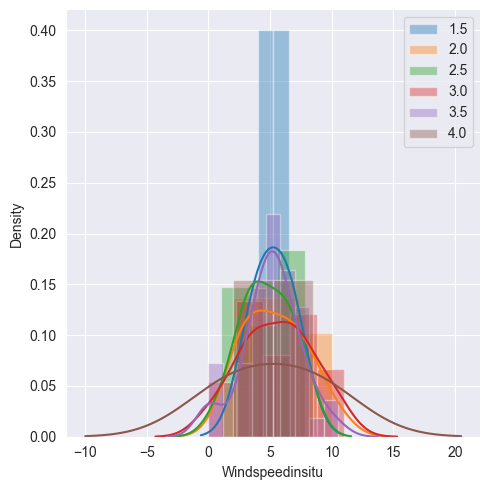

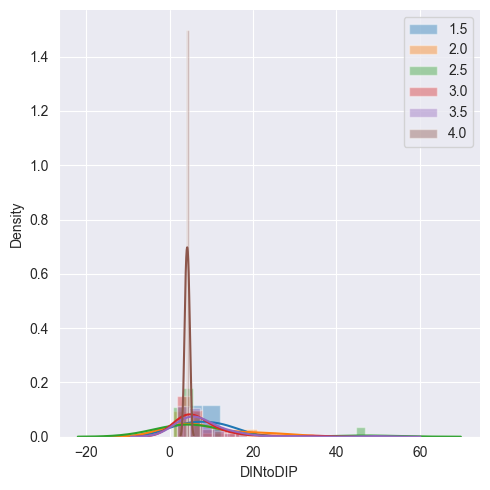

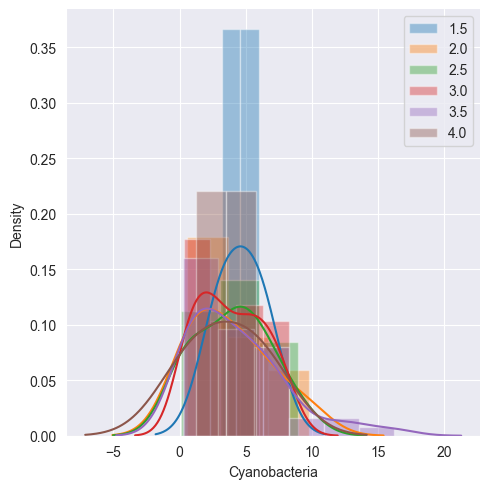

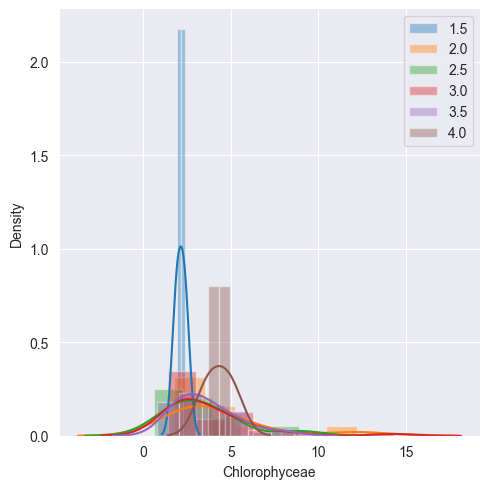

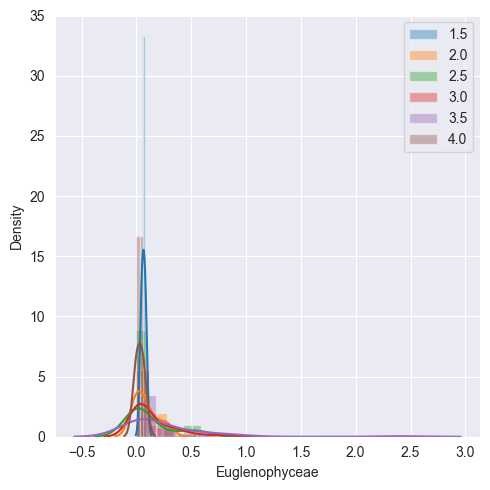

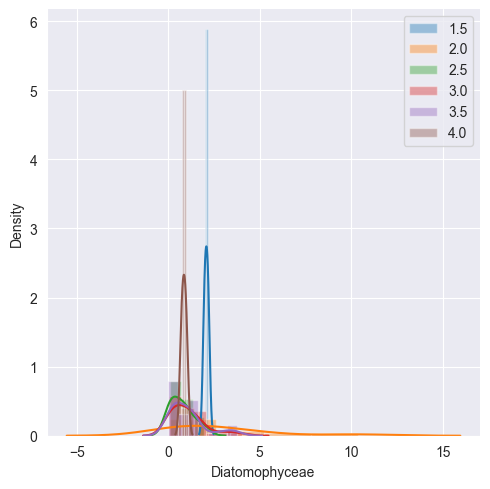

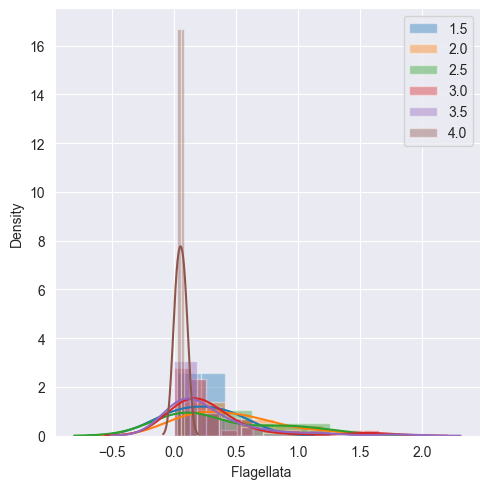

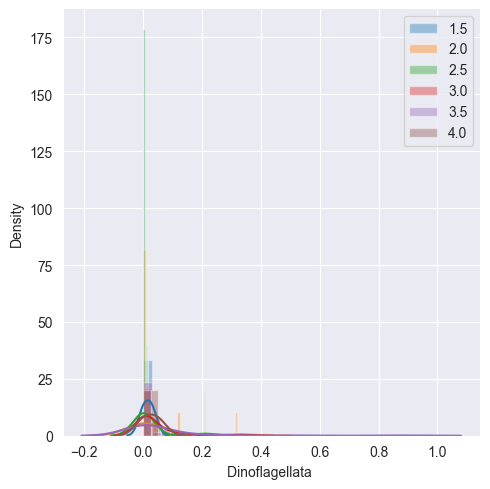

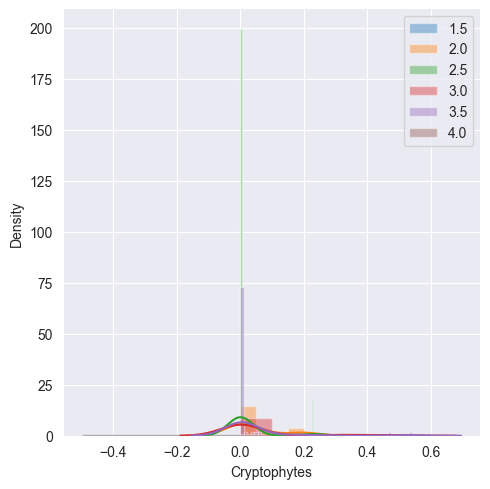

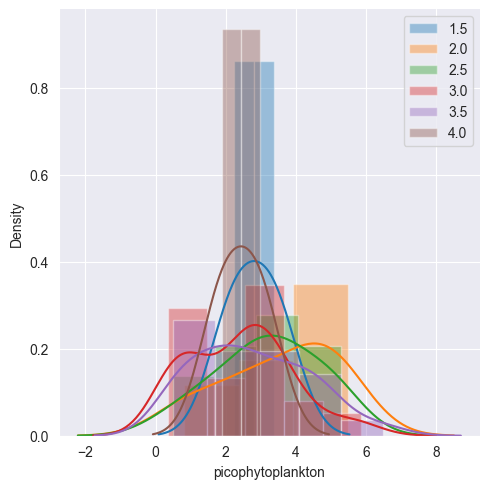

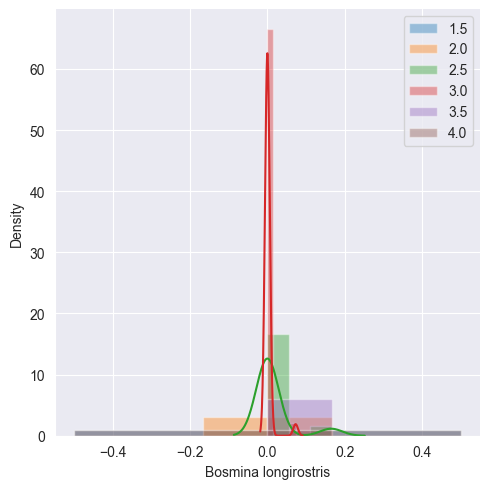

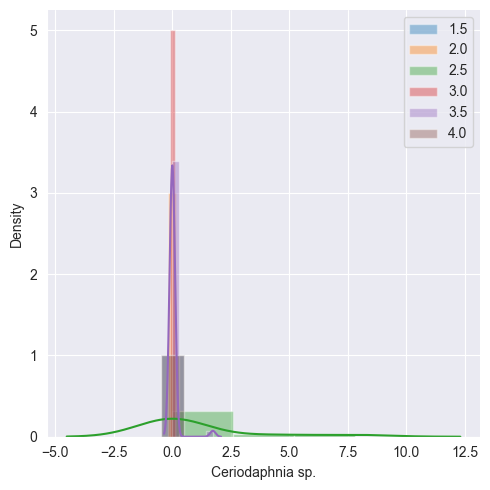

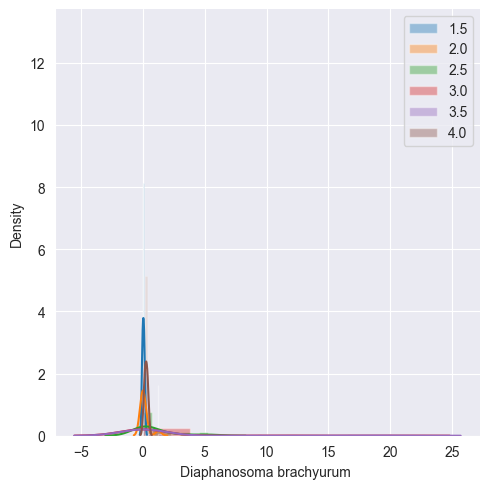

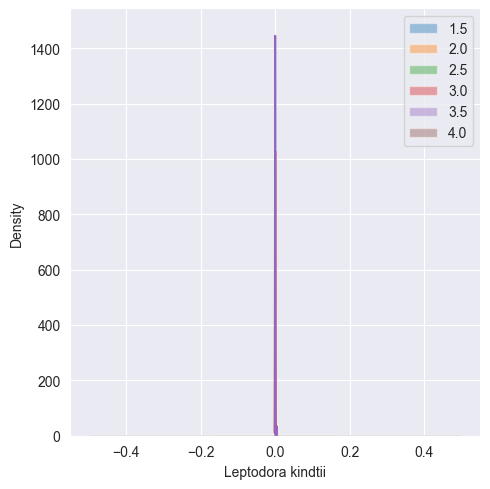

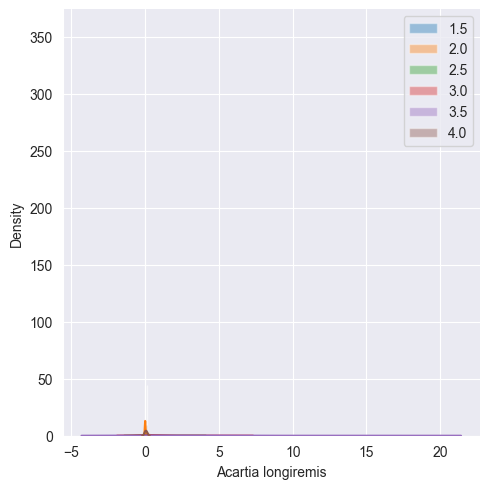

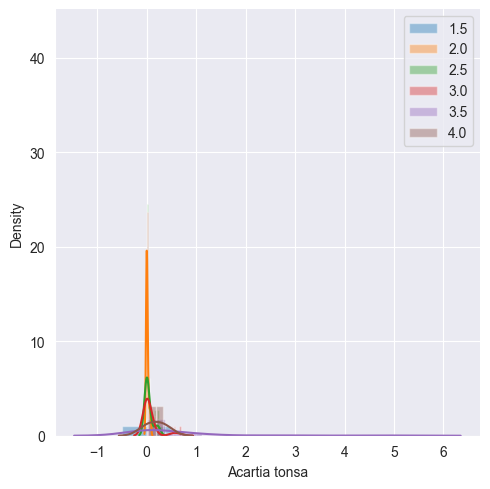

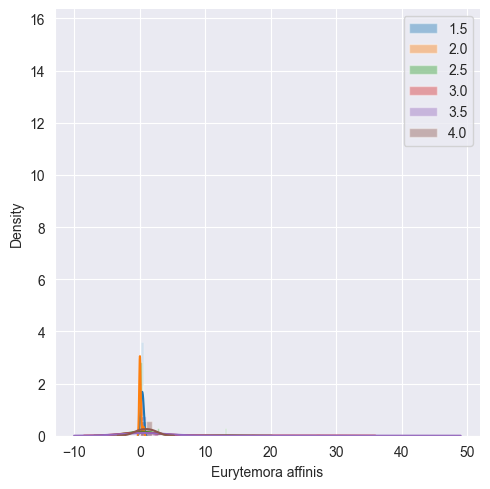

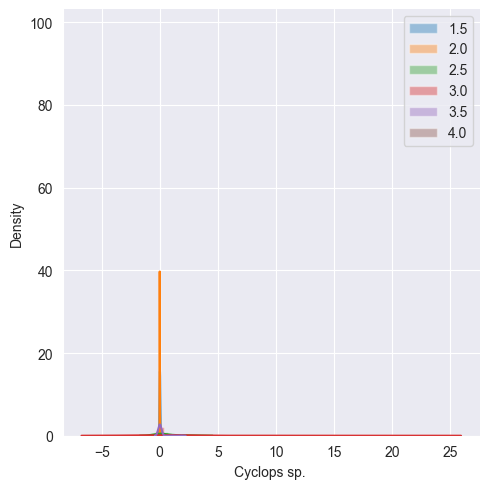

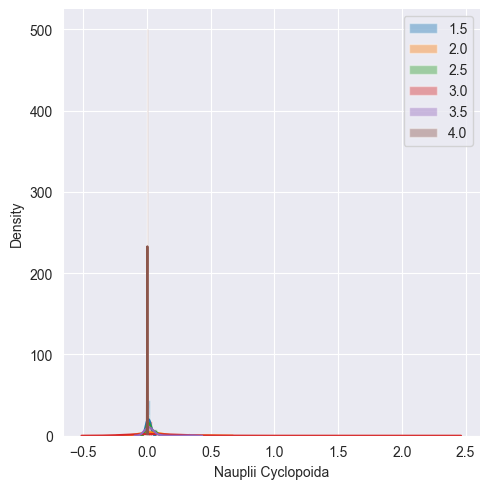

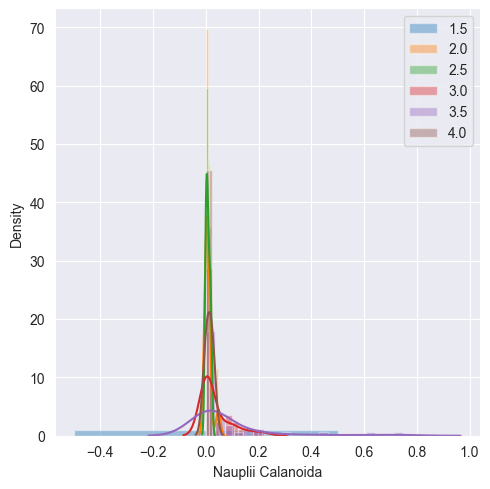

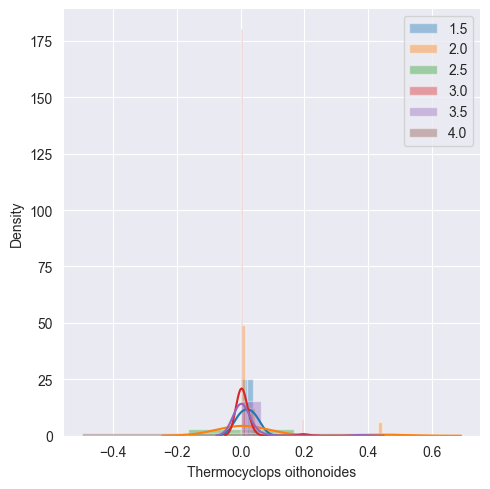

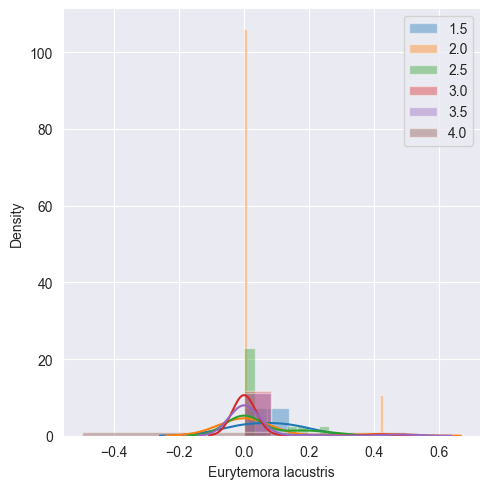

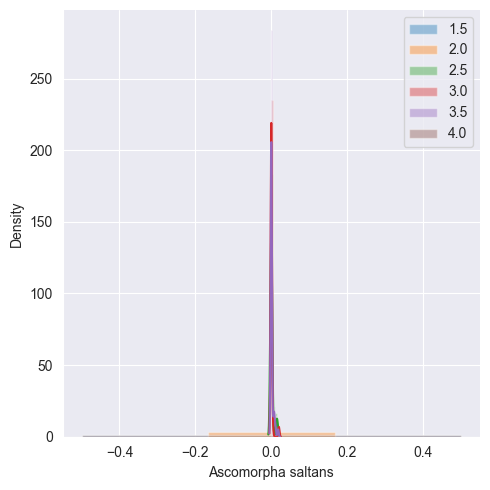

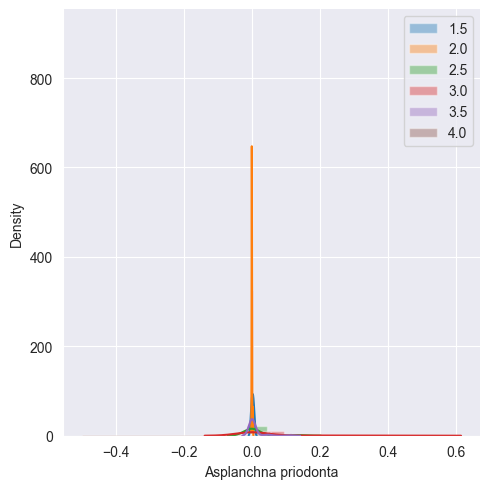

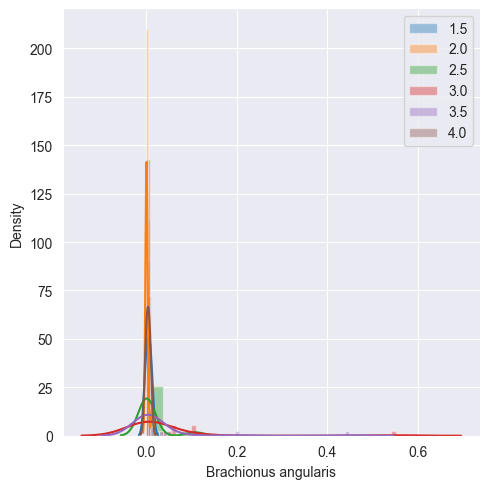

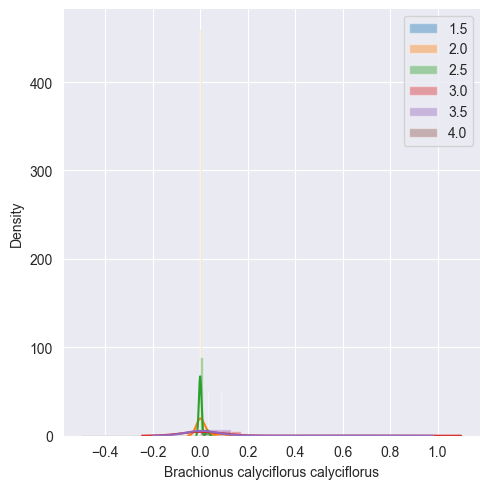

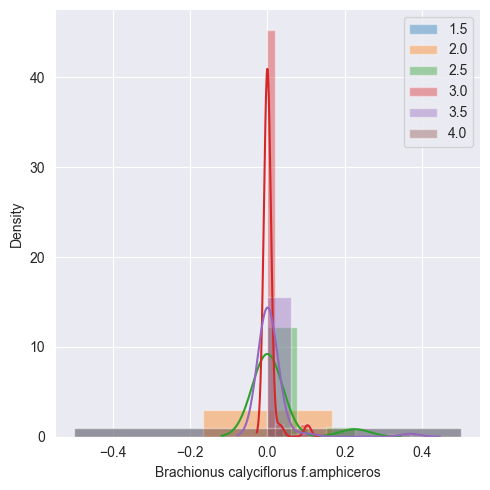

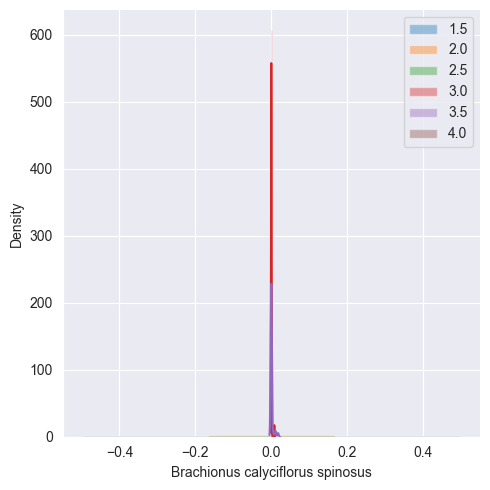

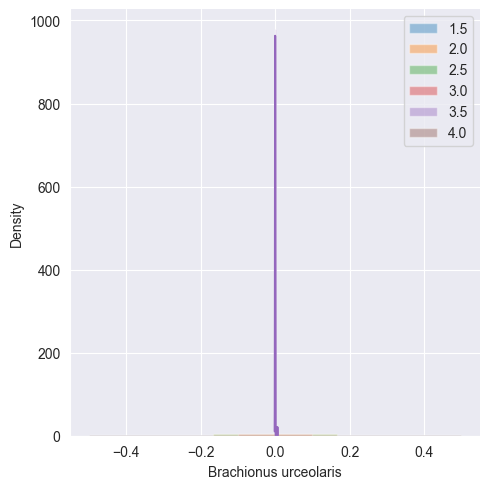

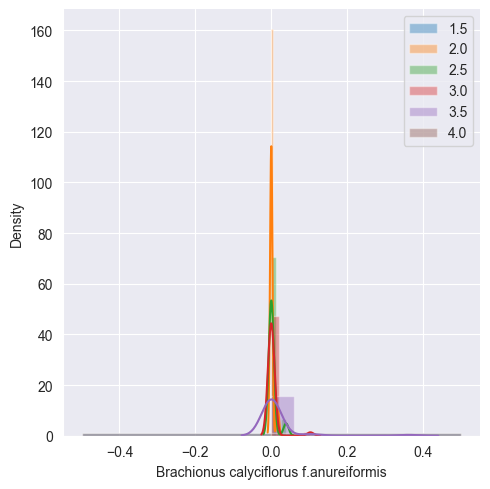

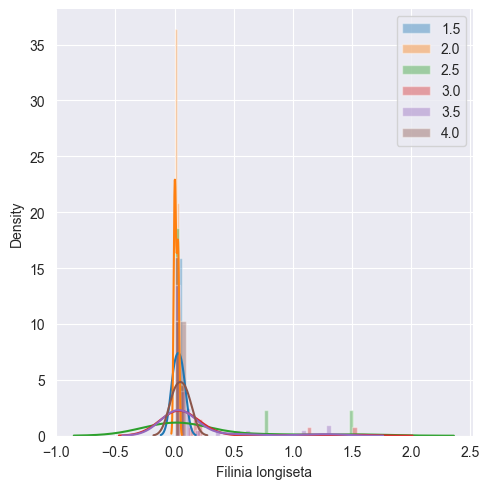

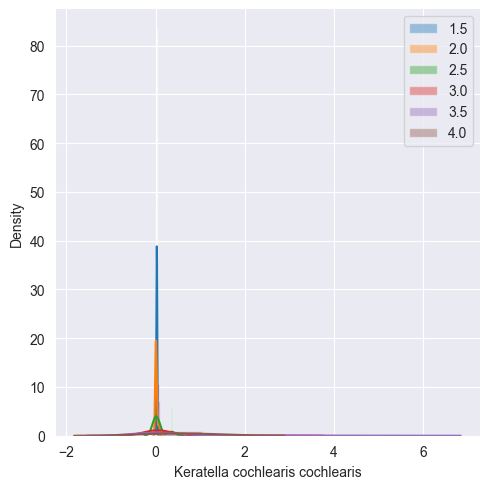

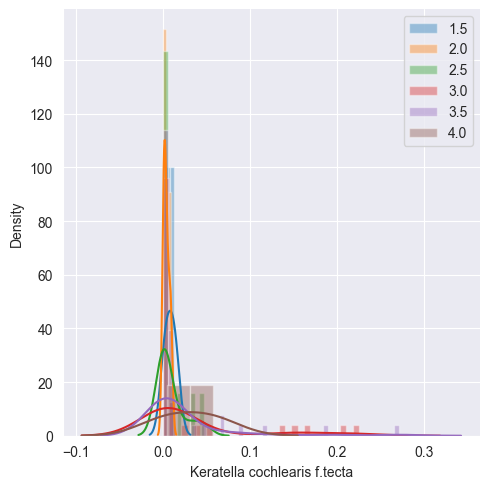

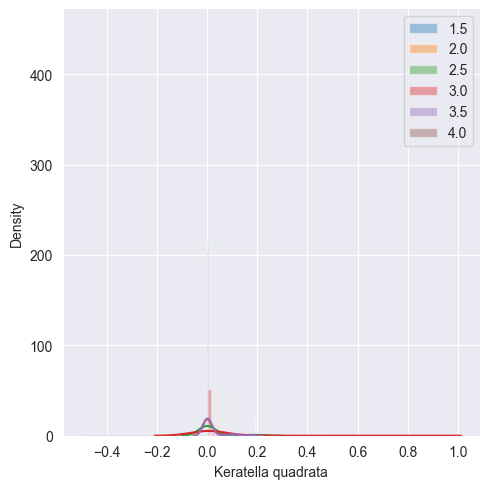

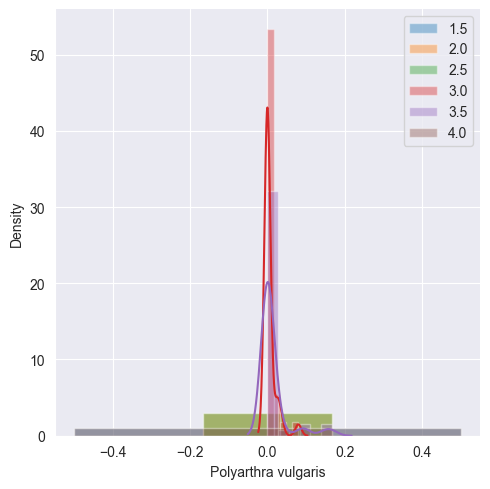

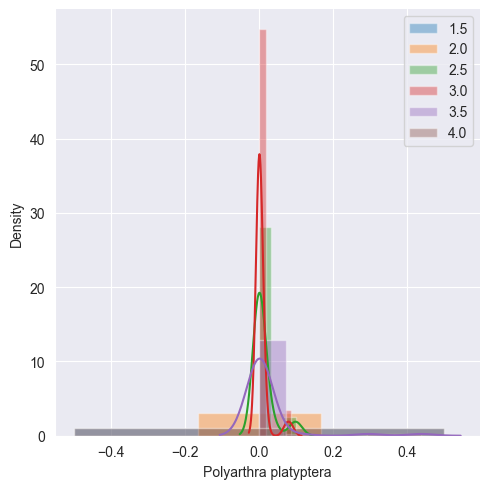

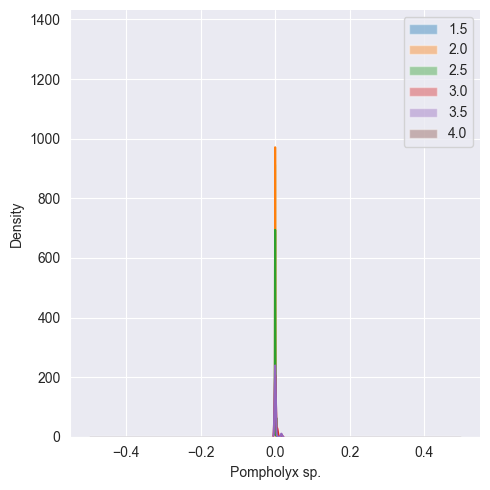

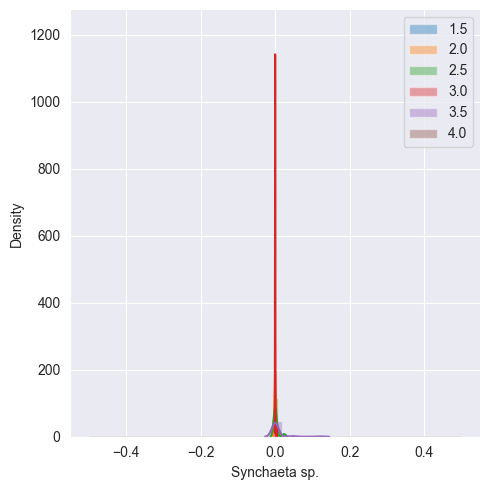

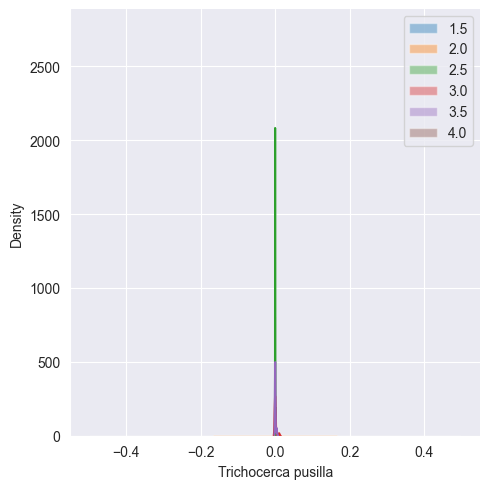

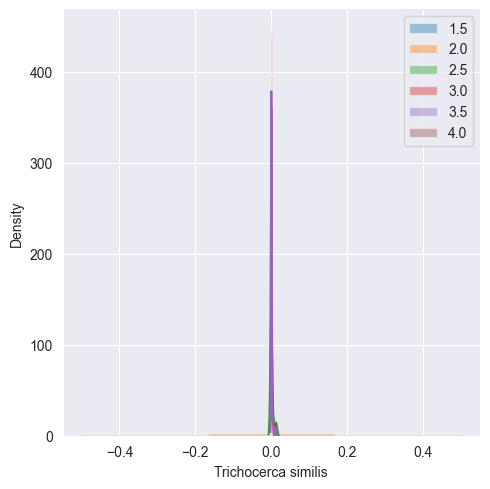

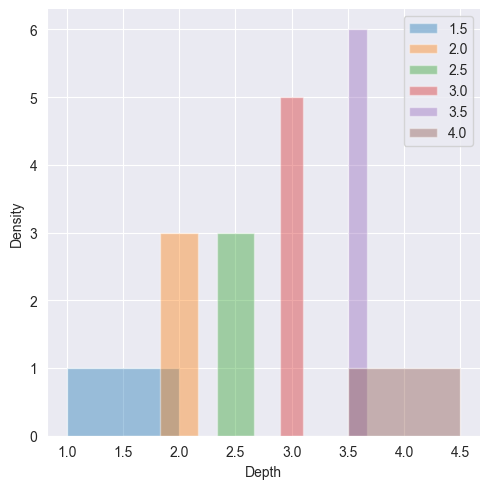

In [18]:
for i in dftrain.columns:
    sns.FacetGrid(dftrain, hue='Depth', height=5).map(sns.distplot, i)
    plt.legend()

In [19]:
class ChiSquare:
  def __init__(self, dataframe):
    self.df = dataframe
    self.p = None  # p-value
    self.chi2 = None  # chi test statistic
    self.dof = None

    self.df_observed = None
    self.df_expected = None

  def _print_chisquare_result(self, col_x, alpha):
    if self.p < alpha:
      result = f'{col_x} is IMPORTANT for Prediction.'
    else:
      result = f'{col_x} is NOT an important predictor. Discard {col_x} from model.'
    print(result)

  def test_independence(self, col_x, col_y, alpha=0.25):
    x = self.df[col_x].astype(str)
    y = self.df[col_y].astype(str)
    self.df_observed = pd.crosstab(y, x)
    self.chi2, self.p, self.dof, expected = stats.chi2_contingency(self.df_observed.values)
    self.df_expected = pd.DataFrame(expected, columns=self.df_observed.columns, index=self.df_observed.index)
    self._print_chisquare_result(col_x, alpha)


cT = ChiSquare(dftrain)

for column_name in dftrain.columns[:-1]:
  cT.test_independence(col_x=column_name, col_y=dftrain.columns[-1])

PSU is NOT an important predictor. Discard PSU from model.
O2 is NOT an important predictor. Discard O2 from model.
temp. is NOT an important predictor. Discard temp. from model.
SS is IMPORTANT for Prediction.
SRP is NOT an important predictor. Discard SRP from model.
DOP is IMPORTANT for Prediction.
PP is NOT an important predictor. Discard PP from model.
NH4N is IMPORTANT for Prediction.
NO3N is NOT an important predictor. Discard NO3N from model.
DON is NOT an important predictor. Discard DON from model.
PN is NOT an important predictor. Discard PN from model.
TN/TP is NOT an important predictor. Discard TN/TP from model.
Fe is NOT an important predictor. Discard Fe from model.
SiO4Si is NOT an important predictor. Discard SiO4Si from model.
DOC is NOT an important predictor. Discard DOC from model.
TPOC is NOT an important predictor. Discard TPOC from model.
Windspeedinsitu is NOT an important predictor. Discard Windspeedinsitu from model.
DINtoDIP is NOT an important predictor. D

In [20]:
outlier_list = []
for i in dftrain.columns:
  q1 = np.percentile(dftrain.loc[:, i], 25)
  q3 = np.percentile(dftrain.loc[:, i], 75)
  step = 1.5 * (q3-q1)
  print(f'Data points considered outliers for the feature {i}')

  outliers_rows = dftrain.loc[~((dftrain[i] >= q1 - step) & (dftrain[i] <= q3 + step)), :]
  outlier_list.append(list(outliers_rows.index))
  outliers = list(chain.from_iterable(outlier_list))

uniq_outlier = list(set(outliers))

dup_outliers = list(set([x for x in outliers if outliers.count(x) > 1]))
print('Outliers list:\n', uniq_outlier)
print('Length of outliers list:\n', len(uniq_outlier))

print('Duplicate list :\n', dup_outliers)
print('Length of duplicates list :\n', len(dup_outliers))

real_data = dftrain.drop(df.index[dup_outliers]).reset_index(drop=True)

print(real_data.shape)

Data points considered outliers for the feature PSU
Data points considered outliers for the feature O2
Data points considered outliers for the feature temp.
Data points considered outliers for the feature SS
Data points considered outliers for the feature SRP
Data points considered outliers for the feature DOP
Data points considered outliers for the feature PP
Data points considered outliers for the feature NH4N
Data points considered outliers for the feature NO3N
Data points considered outliers for the feature DON
Data points considered outliers for the feature PN
Data points considered outliers for the feature TN/TP
Data points considered outliers for the feature Fe
Data points considered outliers for the feature SiO4Si
Data points considered outliers for the feature DOC
Data points considered outliers for the feature TPOC
Data points considered outliers for the feature Windspeedinsitu
Data points considered outliers for the feature DINtoDIP
Data points considered outliers for the fe